# Achievement 4 User Profile Attempt 1

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path= r'Desktop/CF/Achievement 4/Instacart Basket Analysis/02 Data/Prepared Data/410_4.pkl'

In [3]:
path_orig = r'Desktop/CF/Achievement 4/Instacart Basket Analysis'

In [4]:
df= pd.read_pickle(os.path.join(path))

FileNotFoundError: [Errno 2] No such file or directory: 'Desktop/CF/Achievement 4/Instacart Basket Analysis/02 Data/Prepared Data/410_4.pkl'

In [10]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'orders_days_since_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'max_order', 'loyalty_flag', 'Average_order',
       'Spending_flag', 'median_order', 'Frequency_flag', 'First Name',
       'Last Name', 'Gender', 'State', 'Age', 'date_joined', 'Dependants',
       'Marital_Status', 'income', '_merge', 'Region_flag', 'User_profile',
       'Activity'],
      dtype='object')

In [180]:
df_1=df.groupby('User_Profile').agg({'Activity': ['mean', 'min', 'max']})

In [181]:
df_1.to_clipboard()

In [182]:
df_2 =df.groupby('User_Profile').agg({'prices': ['mean', 'min', 'max']})

In [183]:
df_2.to_clipboard()

In [14]:
crosstab_R = pd.crosstab(df['User_profile'], df['Region_flag'], dropna = False)

In [15]:
crosstab_R

Region_flag,Midwest,Northwest,South,West
User_profile,,,,
High Income Single Adult,1507939,1103031,2098076,1636631
High Income Young Parent,63925,50046,93967,70036
High Income Young Single Adult,224841,182227,347463,239370
High income Parent,5097099,3851307,7228260,5584733
Low Income Parent,280145,211403,410255,294747
Low Income Single Adult,77897,58677,112562,82014
Low Income Young Parent,2051,1484,3628,2546
Low Income Young Single Adult,13810,11893,26251,24350


In [16]:
crosstab_D = pd.crosstab(df['User_profile'], df['department_id'], dropna = False)

In [17]:
crosstab_D

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
User_profile,,,,,,,,,,,,,,,,,,,,,
High Income Single Adult,436822,7087,233833,1882786,30155,53264,516604,19412,169512,6457,...,140149,366666,135518,209185,1070199,139715,86811,533952,208039,12827
High Income Young Parent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,277974,0,0,0
High Income Young Single Adult,66903,1083,36710,296045,4482,8665,81169,3081,27146,1003,...,22445,57794,21081,33176,166844,21511,14265,82375,32014,2249
High income Parent,1517190,24251,804378,6519878,101318,184065,1782497,66151,596195,23744,...,499284,1281283,475018,734767,3718747,495866,18795,1857935,712426,46571
Low Income Parent,76403,1446,38162,283956,6504,7465,144088,3312,21645,1707,...,9622,57654,34752,26287,174866,32634,586,218033,38026,2262
Low Income Single Adult,21239,434,9787,77470,1624,1947,38936,866,6116,405,...,2707,15958,9650,7011,50205,8118,1686,60844,10832,741
Low Income Young Parent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9709,0,0,0
Low Income Young Single Adult,4785,110,2156,19141,591,585,8640,243,1522,135,...,578,3548,2076,1648,10967,2014,566,13267,2497,118


In [95]:
def profile_type(row):

 if (row['income'] <40000) and (row['Dependants']==0)and (row['Age']<=26)and (row['department_id']!=18):
    return 'Low Income Young Single Adult'
 if (row['income'] <40000) and (row['Dependants']==0)and (row['Age']>=26)and (row['department_id']!=18):
    return 'Low Income Single Adult'
 if (row['income'] >=40000) and (row['Dependants']==0)and (row['Age']<=26)and (row['department_id']!=18):
    return 'High Income Young Single Adult'
 if (row['income'] >=40000) and (row['Dependants']==0)and (row['Age']>=26)and (row['department_id']!=18):
    return 'High Income Single Adult'    
 if (row['income'] <40000)and (row['Dependants']>=0)and (row['Age']<=26):
    return 'Low Income Young Parent'
 if (row['income'] >=40000)and (row['Dependants']>=0)and (row['Age']<=26):
    return 'High Income Young Parent'
 if (row['income'] <40000) and (row['Dependants']>=0)and (row['Age']>=26):
    return 'Low Income Parent'
 if (row['income'] >=40000) and (row['Dependants']>=0)and (row['Age']>=26):
    return 'High income Parent'
 else: return 'Not enough data'  

In [96]:
df['User_Profile'] = df.apply(profile_type, axis =1)

In [97]:
df['User_Profile'].value_counts()

User_Profile
High income Parent                19069065
High Income Single Adult           6258866
High Income Young Parent           3071384
High Income Young Single Adult      979636
Low Income Parent                   976764
Low Income Single Adult             329464
Low Income Young Parent             231747
Low Income Young Single Adult        75738
Name: count, dtype: int64

In [98]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,orders_days_since_order,product_id,add_to_cart_order,reordered,product_name,...,State,Age,date_joined,Dependants,Marital_Status,income,_merge,Region_flag,Activity,User_Profile
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,10,High income Parent
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,10,High income Parent
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,10,High income Parent
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,10,High income Parent
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,10,High income Parent


In [112]:
crosstab_D = pd.crosstab(df['User_Profile'], df['department_id'], dropna = False)

In [113]:
crosstab_D

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
User_Profile,,,,,,,,,,,,,,,,,,,,,
High Income Single Adult,436822,7087,233833,1882786,30155,53264,516604,19412,169512,6457,...,140149,366666,135518,209185,1070199,139715,0,533952,208039,12827
High Income Young Parent,211644,3541,112411,901369,15532,25784,241791,9964,83793,3386,...,70198,178580,67228,103131,521410,68328,56775,249182,99070,6631
High Income Young Single Adult,66903,1083,36710,296045,4482,8665,81169,3081,27146,1003,...,22445,57794,21081,33176,166844,21511,0,82375,32014,2249
High income Parent,1305546,20710,691967,5618509,85786,158281,1540706,56187,512402,20358,...,429086,1102703,407790,631636,3197337,427538,341070,1608753,613356,39940
Low Income Parent,62003,1139,30862,230043,5414,5976,116704,2564,17377,1400,...,7915,47107,28088,21427,140551,27068,10503,174201,30565,1814
Low Income Single Adult,21239,434,9787,77470,1624,1947,38936,866,6116,405,...,2707,15958,9650,7011,50205,8118,0,60844,10832,741
Low Income Young Parent,14400,307,7300,53913,1090,1489,27384,748,4268,307,...,1707,10547,6664,4860,34315,5566,2044,43832,7461,448
Low Income Young Single Adult,4785,110,2156,19141,591,585,8640,243,1522,135,...,578,3548,2076,1648,10967,2014,0,13267,2497,118


In [43]:
crosstab_D.max()

department_id
1     1305546
2       20710
3      691967
4     5618509
5       85786
6      158281
7     1540706
8       56187
9      512402
10      20358
11     259404
12     429086
13    1102703
14     407790
15     631636
16    3197337
17     427538
18     385785
19    1608753
20     613356
21      39940
dtype: int64

In [26]:
df = df.drop(columns = ['User_profile'])

In [27]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,orders_days_since_order,product_id,add_to_cart_order,reordered,product_name,...,State,Age,date_joined,Dependants,Marital_Status,income,_merge,Region_flag,Activity,User_Profile
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,10,High income Parent
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,10,High income Parent
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,10,High income Parent
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,10,High income Parent
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,10,High income Parent


In [105]:
crosstab_R = pd.crosstab( df['Region_flag'],df['User_Profile'], dropna = False)

In [106]:
crosstab_R

User_Profile,High Income Single Adult,High Income Young Parent,High Income Young Single Adult,High income Parent,Low Income Parent,Low Income Single Adult,Low Income Young Parent,Low Income Young Single Adult
Region_flag,,,,,,,,
Midwest,1486600,712150,221895,4473159,225774,77607,56845,13677
Northwest,1088493,532637,179195,3386286,172228,58362,41114,11753
South,2068841,1044102,342278,6312545,335774,111869,78969,26084
West,1614932,782495,236268,4897075,242988,81626,54819,24224


In [107]:
df.to_pickle(os.path.join(path_orig, '02 Data','Prepared Data', '410_5.pkl'))

In [114]:
crosstab_D

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
User_Profile,,,,,,,,,,,,,,,,,,,,,
High Income Single Adult,436822,7087,233833,1882786,30155,53264,516604,19412,169512,6457,...,140149,366666,135518,209185,1070199,139715,0,533952,208039,12827
High Income Young Parent,211644,3541,112411,901369,15532,25784,241791,9964,83793,3386,...,70198,178580,67228,103131,521410,68328,56775,249182,99070,6631
High Income Young Single Adult,66903,1083,36710,296045,4482,8665,81169,3081,27146,1003,...,22445,57794,21081,33176,166844,21511,0,82375,32014,2249
High income Parent,1305546,20710,691967,5618509,85786,158281,1540706,56187,512402,20358,...,429086,1102703,407790,631636,3197337,427538,341070,1608753,613356,39940
Low Income Parent,62003,1139,30862,230043,5414,5976,116704,2564,17377,1400,...,7915,47107,28088,21427,140551,27068,10503,174201,30565,1814
Low Income Single Adult,21239,434,9787,77470,1624,1947,38936,866,6116,405,...,2707,15958,9650,7011,50205,8118,0,60844,10832,741
Low Income Young Parent,14400,307,7300,53913,1090,1489,27384,748,4268,307,...,1707,10547,6664,4860,34315,5566,2044,43832,7461,448
Low Income Young Single Adult,4785,110,2156,19141,591,585,8640,243,1522,135,...,578,3548,2076,1648,10967,2014,0,13267,2497,118


In [122]:
crosstab_U = pd.crosstab( df['Region_flag'],df['Spending_flag'], dropna = False)

In [119]:
crosstab_U

Spending_flag,High Spender,Low Spender
Region_flag,,
Midwest,148829,7118878
Northwest,103230,5366838
South,199815,10120647
West,152710,7781717


In [121]:
crosstab_F = pd.crosstab( df['Region_flag'],df['Frequency_flag'], dropna = False)

In [123]:
crosstab_F

Frequency_flag,Frequent customer,Non-frequent customer,Regular customer
Region_flag,,,
Midwest,5171191,524299,1572217
Northwest,3922951,379743,1167374
South,7413490,733369,2173603
West,5718885,552962,1662580


In [125]:
crosstab_L = pd.crosstab( df['Region_flag'],df['loyalty_flag'], dropna = False)

In [126]:
crosstab_L

loyalty_flag,Loyal customer,New customer,Regular customer
Region_flag,,,
Midwest,2375969,1137734,3754004
Northwest,1843750,842941,2783377
South,3408818,1595046,5316598
West,2665200,1232129,4037098


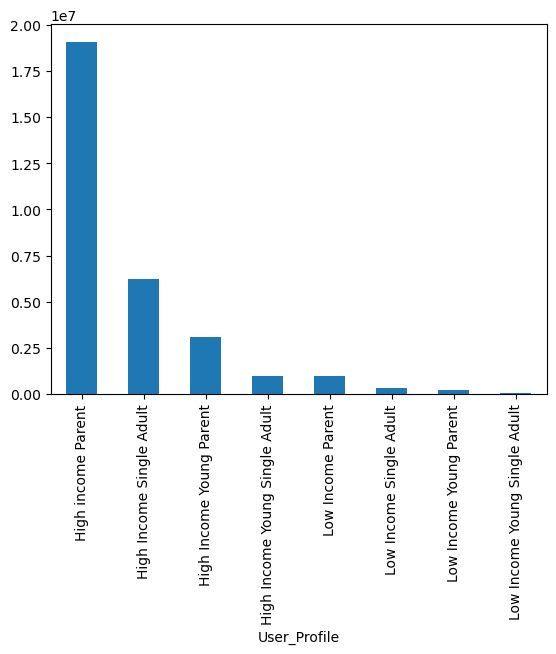

In [129]:
bar = df['User_Profile'].value_counts().plot.bar()

<Axes: ylabel='Frequency'>

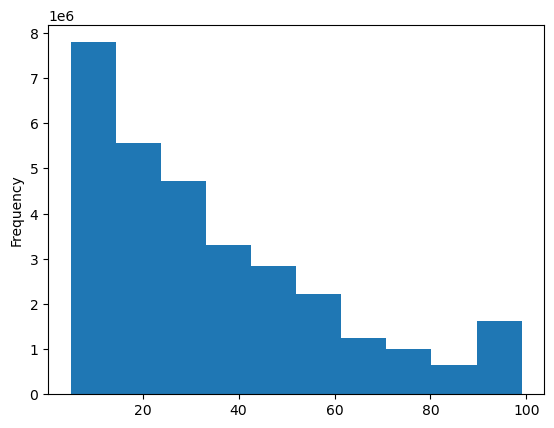

In [150]:
df['Activity'].plot.hist(bins = 10)

In [158]:
crosstab_D.to_clipboard()

In [159]:
path_d = r'Desktop/CF/Achievement 4/Instacart Basket Analysis/02 Data/Prepared Data/dept_df.pkl'

In [160]:
df_d= pd.read_pickle(os.path.join(path_d))

,Department
Department ID,
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [163]:
df['income'].max()

593901

In [167]:
df_HIP = df.loc[df['User_Profile'] == ('High income Parent')]

In [169]:
df_HIP['Marital_Status'].value_counts() 

Marital_Status
married             18982254
single                 52974
divorced/widowed       33837
Name: count, dtype: int64

In [176]:
crosstab_F.to_clipboard()

In [185]:
bar.figure.savefig(os.path.join(path_orig, '04 Analysis','Visualizations', 'bar_User_profile.png'))

In [188]:
crosstab_A = pd.crosstab( df['User_Profile'],df['orders_day_of_week'], dropna = False)

In [189]:
crosstab_A

orders_day_of_week,0,1,2,3,4,5,6
User_Profile,,,,,,,
High Income Single Adult,1213010,1087488,806118,739552,726471,819026,867201
High Income Young Parent,598858,525556,394328,361258,355247,400219,435918
High Income Young Single Adult,187451,175426,123682,113654,116532,124883,138008
High income Parent,3679345,3298495,2468951,2250853,2225178,2466060,2680183
Low Income Parent,145095,198253,141123,125865,125637,134440,106351
Low Income Single Adult,46541,67946,48882,41951,40599,47979,35566
Low Income Young Parent,32533,49002,34059,29949,28603,33856,23745
Low Income Young Single Adult,10985,14872,11318,9845,9990,10800,7928
